<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/ITERATION_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-hsgz8426
  Entered build tracker: /tmp/pip-build-tracker-hsgz8426
  Created temporary directory: /tmp/pip-install-92lh25eq
  Created temporary directory: /tmp/pip-ephem-wheel-cache-18zp9i32
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.7 MB/s eta 0:00:00


In [103]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [104]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

Llama.generate: prefix-match hit


In [105]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.47, -6.93, -5.27, -3.72, -2.41, -1.26, -0.36, 1.26, 2.41, 3.72, 5.27, 6.93, 8.47]


In [106]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):

    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax


    particles = []
    nSize = np.size(Quasi_Random_Sequence_Initialisation)
    for i in range(nSize):
        position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })
    for _ in range(nPop - nSize):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    print(np.size(particles))

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            # Update Velocity
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']

        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
        g_values.append(GlobalBest['Cost'])
        w *= wdamp

        w_values.append(w)
        g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [107]:
# def sphere(x):
#     return sum(x**2)

In [108]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [110]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [111]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [112]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [113]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [114]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [115]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [116]:
costs = []
errors = []

In [117]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [118]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

# # Example of how to access results for a particular problem
# problem_1_results = results[1]
# print("\n\n\nProblem 1 Best Cost:", problem_1_results['BestCost'])
# print("Problem 1 Best Position:", problem_1_results['BestPosition'])
# print("Problem 1 Error:", problem_1_results['Error'])

# # Plotting results for one of the problems (e.g., Problem 1)
# plt.plot(problem_1_results['w_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations - Problem 1')
# plt.show()

# plt.plot(problem_1_results['g_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations - Problem 1')
# plt.show()


100
Iteration 1: Best Cost = 63836.05362102631
Iteration 2: Best Cost = 58208.07117848527


<ipython-input-109-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-106-f2f9ec8f53c4>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']


Streaming output truncated to the last 5000 lines.
 -4317.89999953 -4317.89999953 -4317.89999954 -4317.89999954
 -4317.89999955 -4317.89999955 -4317.89999955 -4317.89999955
 -4317.89999965 -4317.89999967 -4317.89999967 -4317.89999967
 -4317.89999967 -4317.89999968 -4317.89999974 -4317.89999982
 -4317.89999983 -4317.89999986 -4317.89999986 -4317.89999986
 -4317.89999988 -4317.89999989 -4317.89999989 -4317.89999989
 -4317.89999992 -4317.89999992 -4317.89999992 -4317.89999994
 -4317.89999994 -4317.89999995 -4317.89999995 -4317.89999996
 -4317.89999996 -4317.89999996 -4317.89999996 -4317.89999997
 -4317.89999997 -4317.89999997 -4317.89999997 -4317.89999997
 -4317.89999998 -4317.89999998 -4317.89999998 -4317.89999998
 -4317.89999999 -4317.89999999 -4317.89999999 -4317.89999999
 -4317.89999999 -4317.89999999 -4317.89999999 -4317.89999999
 -4317.89999999 -4317.89999999 -4317.89999999 -4317.89999999
 -4317.89999999 -4317.89999999 -4317.9        -4317.9
 -4317.9        -4317.9        -4317.9   

In [119]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

7.958078640513122e-11
0.30105293342785444
0.00022193444624463154
2.7465716812002938e-08
1.3125392053767087
1.2138180870223039
24862.137969149382
0.005344445027731126
1382.933143583402
10371.411999216612
31535.471902802674
3964.9276003332598
1199.8060287571423
18064.414550342244
5.773718896885555
682.1000000000149
682.1000100247211
24283.40248910633
12627.57824259215
6.913384981673559
5.665302477045628
109461.60075539463
42.593457140065844
129.1877471183874





Problem 1 Best Cost: [63836.05362103 58208.07117849 52879.56371193 38048.27771344
 26167.89848958 19986.2024982  16059.55157695 15204.23730182
 14612.56963028 11087.69241979  6939.96655551  5430.69545599
  4052.56474574  3039.51559298  1029.4112497   1029.4112497
  1029.4112497    316.20091935   316.20091935  -138.96463258
  -138.96463258  -138.96463258  -349.32004986  -449.11607523
  -449.11607523  -449.11607523  -611.30119807  -611.30119807
  -629.28892689  -680.42628271  -684.60944593  -741.57866903
  -741.57866903  -772.04231884  -774.44601224  -774.44601224
  -810.71853618  -855.04968146  -863.64288801  -863.64288801
  -863.64288801  -901.50533491  -919.11727586  -919.11727586
  -919.11727586  -919.11727586  -933.46536656  -937.89216603
  -944.53695894  -944.53695894  -950.84542682  -955.62652285
  -955.62652285  -955.62652285  -955.62652285  -989.38751836
  -989.38751836  -989.38751836  -996.80511833 -1005.15229495
 -1005.15229495 -1005.67850112 -1023.57592032 -1037.96258138
 

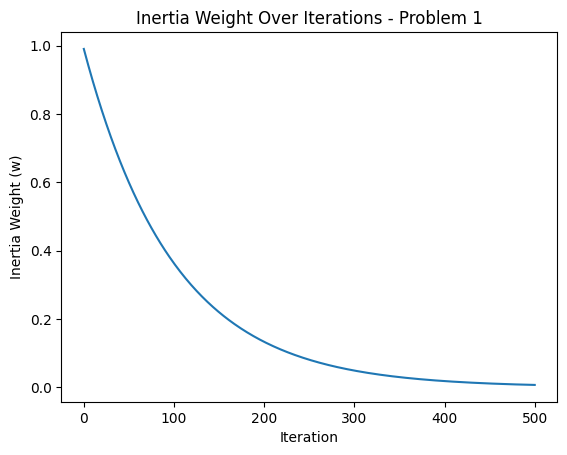

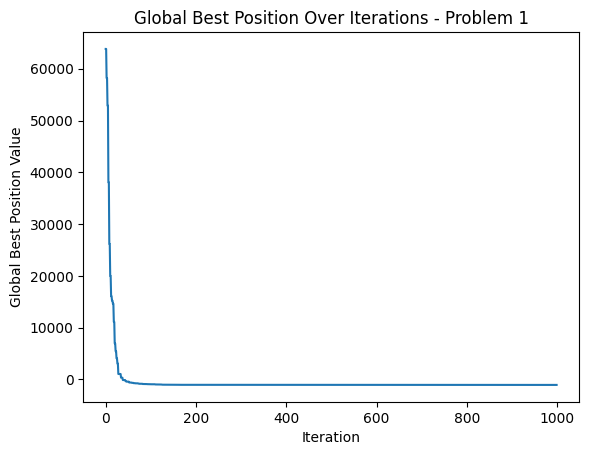




Problem 2 Best Cost: [-701.39484547 -701.40298706 -701.41952356 -701.44058887 -701.46594594
 -701.49566293 -701.52107069 -701.52791954 -701.52795402 -701.55656473
 -701.57428826 -701.58098399 -701.6001889  -701.6275731  -701.63683176
 -701.65235591 -701.65235591 -701.65235591 -701.66992362 -701.69470997
 -701.69642486 -701.69731233 -701.71241413 -701.71241413 -701.72026569
 -701.73854903 -701.741131   -701.75241724 -701.75311347 -701.77405726
 -701.78463733 -701.79450173 -701.79596501 -701.80183066 -701.8194387
 -701.83276988 -701.83276988 -701.83276988 -701.83276988 -701.83537172
 -701.83719922 -701.83719922 -701.83719922 -701.83794161 -701.8429457
 -701.84876579 -701.85578689 -701.85688729 -701.85688729 -701.85688729
 -701.85688729 -701.87774083 -701.87969203 -701.88354962 -701.92720031
 -701.92720031 -701.92720031 -701.92720031 -701.92720031 -701.94947485
 -701.94947485 -701.95217497 -701.95217497 -701.95217497 -701.96618445
 -701.96618445 -701.96728701 -701.97497551 -701.9889904

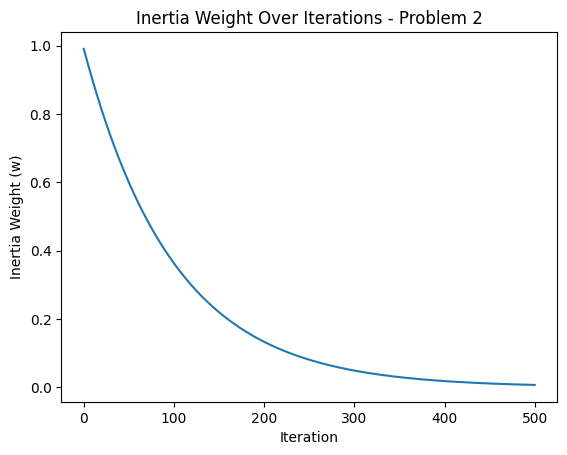

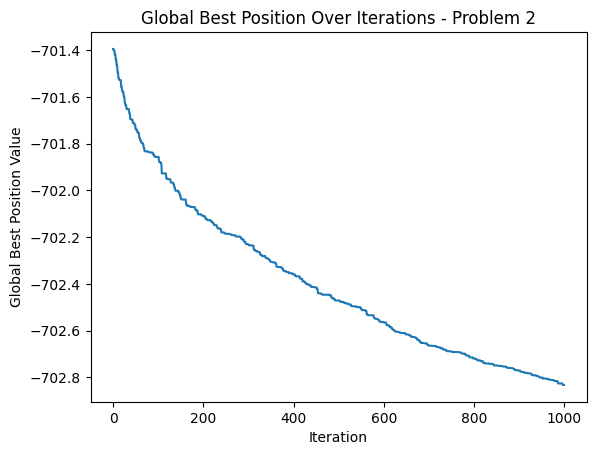




Problem 3 Best Cost: [ 3.60445433e+10  2.84522315e+10  2.55834391e+10  1.85520563e+10
  1.56880821e+10  1.12076749e+10  9.09584069e+09  8.17031782e+09
  7.36147372e+09  6.84373395e+09  5.16658059e+09  3.31611725e+09
  3.31611725e+09  3.27157663e+09  2.63800892e+09  2.34282943e+09
  2.20196003e+09  1.70049092e+09  1.70049092e+09  1.50940382e+09
  1.08869408e+09  9.46183069e+08  8.15278959e+08  5.25875226e+08
  5.25875226e+08  5.15074699e+08  5.15074699e+08  5.15074699e+08
  4.76457002e+08  4.21616065e+08  4.04473332e+08  3.61663911e+08
  3.44870539e+08  3.44463912e+08  3.44463912e+08  3.44463912e+08
  2.79755581e+08  2.49370045e+08  2.19431476e+08  2.19431476e+08
  1.91843995e+08  1.91843995e+08  1.87724080e+08  1.45884056e+08
  1.45884056e+08  1.42431431e+08  1.38442047e+08  1.38442047e+08
  1.20928782e+08  1.20928782e+08  1.20928782e+08  1.12967147e+08
  1.12967147e+08  9.99349450e+07  9.99349450e+07  9.99349450e+07
  7.14824149e+07  7.14824149e+07  6.91041052e+07  5.75884388e+07
 

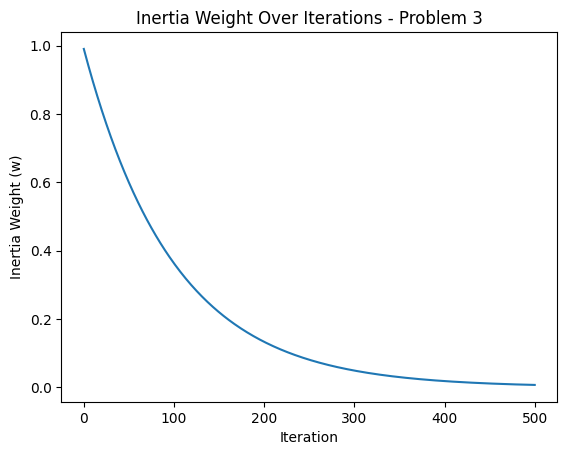

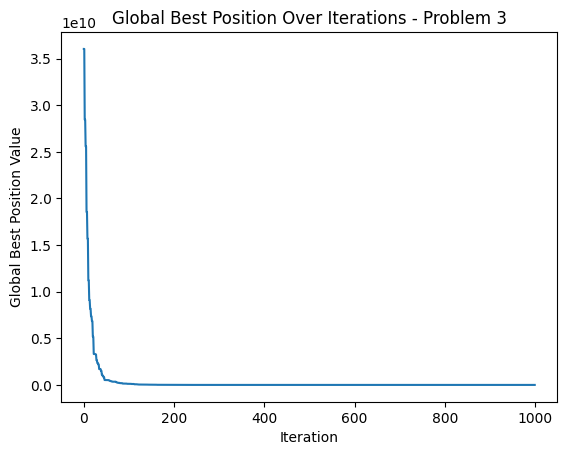




Problem 4 Best Cost: [ 3.73555759e+05  2.82167148e+05  2.64632972e+05  2.23147066e+05
  1.49743918e+05  1.01668709e+05  7.64352825e+04  6.42633612e+04
  5.19626986e+04  4.42655900e+04  3.64353481e+04  2.98081100e+04
  2.63476735e+04  1.98211722e+04  1.35570741e+04  1.32714411e+04
  1.21355587e+04  7.08075183e+03  4.00713088e+03  3.78335123e+03
  3.78335123e+03  3.78335123e+03  3.78335123e+03  3.75817705e+03
  2.97420589e+03  2.28215206e+03  2.28215206e+03  2.28215206e+03
  2.19077993e+03  1.98851952e+03  1.68870063e+03  1.65117954e+03
  1.57624562e+03  1.12698013e+03  1.12698013e+03  1.12698013e+03
  9.36191761e+02  9.36191761e+02  9.36191761e+02  9.36191761e+02
  7.22943759e+02  7.22943759e+02  7.22943759e+02  4.52991653e+02
  4.52991653e+02  4.52991653e+02  4.25385958e+02  4.15515108e+02
  4.15515108e+02  2.73110664e+02  1.75246370e+02  1.21271942e+02
  1.09750372e+02  6.74941339e+01  6.74941339e+01  6.74941339e+01
  4.26019924e+01  2.23388093e+01  3.66028567e+00  2.00894937e+00
 

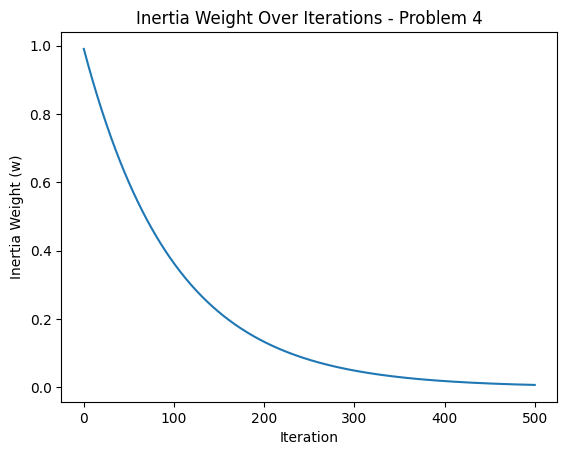

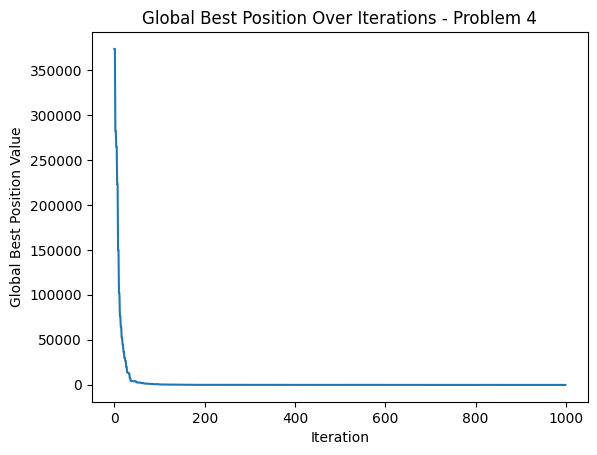




Problem 5 Best Cost: [-334.2218748  -334.25105009 -334.2568479  -334.30761686 -334.35164269
 -334.4056857  -334.46781206 -334.49695735 -334.51504369 -334.53876804
 -334.56868421 -334.5917488  -334.62132311 -334.65130941 -334.65495236
 -334.67648894 -334.7235319  -334.7235319  -334.7235319  -334.7235319
 -334.75684732 -334.78894771 -334.80354757 -334.80354757 -334.81158498
 -334.83680949 -334.84807569 -334.86080265 -334.86080265 -334.88633364
 -334.89895677 -334.9096579  -334.9096579  -334.9096579  -334.92674938
 -334.92674938 -334.9414645  -334.95904128 -334.95904128 -334.9643452
 -334.9643452  -334.9643452  -334.98147773 -334.98147773 -334.98941062
 -334.98941062 -334.98941062 -334.98941062 -335.01048753 -335.01048753
 -335.01048753 -335.01048753 -335.01116814 -335.03889993 -335.03889993
 -335.04185114 -335.05700252 -335.05700252 -335.08166973 -335.08166973
 -335.08166973 -335.08166973 -335.08166973 -335.11462741 -335.12419177
 -335.12419177 -335.13830185 -335.13830185 -335.1383018

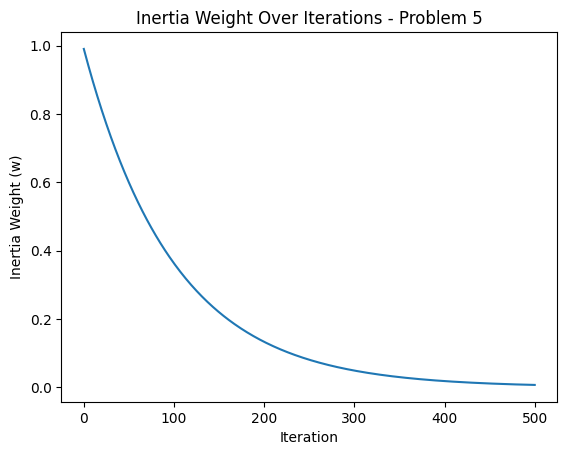

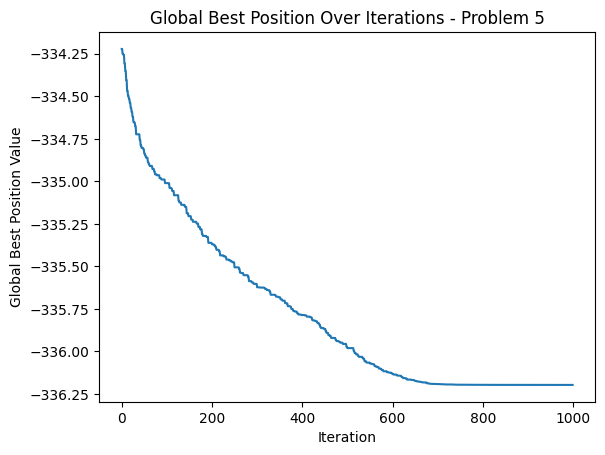




Problem 6 Best Cost: [-183.52198346 -183.5627939  -183.59132993 -183.6246959  -183.72013229
 -183.79680674 -183.83976071 -183.84325855 -183.86500309 -183.86688138
 -183.96227504 -183.96819885 -183.98401971 -183.98401971 -184.0306399
 -184.04560278 -184.04560278 -184.04604344 -184.05482333 -184.06884585
 -184.07422017 -184.12396471 -184.12396471 -184.12396471 -184.18828593
 -184.18828593 -184.20084237 -184.20084237 -184.21114893 -184.22492151
 -184.22492151 -184.2717502  -184.27226261 -184.29929133 -184.29929133
 -184.29929133 -184.30223169 -184.32173427 -184.33740542 -184.33740542
 -184.34330521 -184.37606675 -184.39403945 -184.39403945 -184.39403945
 -184.40794014 -184.40794014 -184.40794014 -184.43118472 -184.43118472
 -184.43869768 -184.43869768 -184.43869768 -184.46338591 -184.47645701
 -184.48584082 -184.48584082 -184.48660147 -184.52241872 -184.52241872
 -184.55542292 -184.55542292 -184.55686619 -184.56132786 -184.56132786
 -184.57591556 -184.57888026 -184.57888026 -184.585358

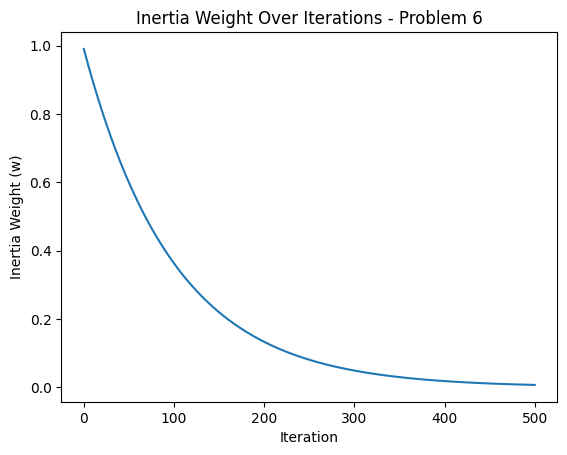

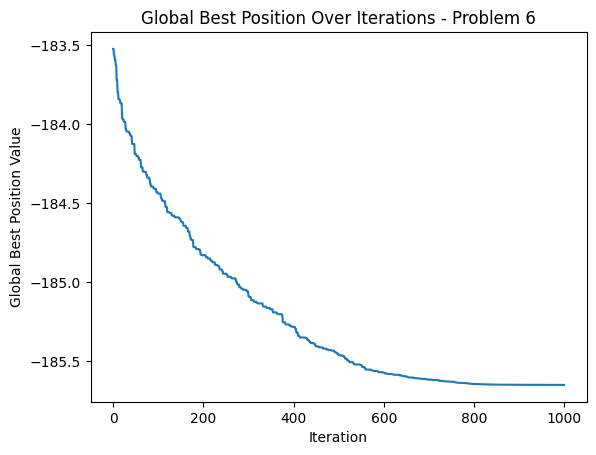




Problem 7 Best Cost: [56607.87872287 49170.40465269 45535.59964879 45535.59964879
 45535.59964879 45535.59964879 45535.59964879 45535.59964879
 45535.59964879 43642.75899068 39379.45444796 38146.43444093
 38146.43444093 38146.43444093 38146.43444093 38146.43444093
 37409.43365627 37208.64216403 37208.64216403 37208.64216403
 35211.93511371 35211.93511371 35211.93511371 35211.93511371
 35046.03265983 35046.03265983 34312.10964311 34312.10964311
 33877.68603367 33877.68603367 33877.68603367 33877.68603367
 33877.68603367 33877.68603367 33877.68603367 33877.68603367
 33604.35513829 33604.35513829 33279.1170019  32358.20234235
 32358.20234235 32358.20234235 32101.14894582 32101.14894582
 32101.14894582 31462.03173615 31462.03173615 31462.03173615
 31462.03173615 31373.28940936 31317.81918675 31317.81918675
 31317.81918675 31317.81918675 31317.81918675 31278.92746593
 31278.92746593 31172.58650546 30892.10166416 30892.10166416
 30845.76997939 30845.76997939 30754.46201859 30754.46201859


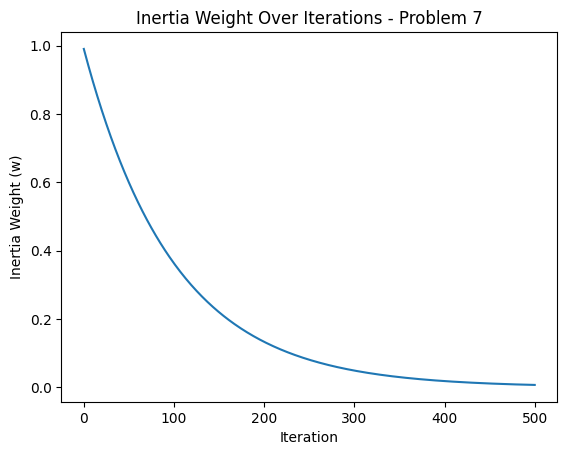

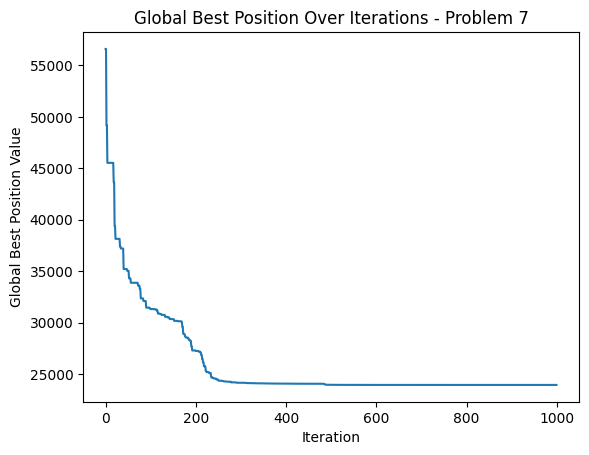




Problem 8 Best Cost: [ 5.50882719e+04  4.59410398e+04  4.15218827e+04  3.84587509e+04
  3.74415589e+04  3.37009272e+04  3.37009272e+04  3.23466622e+04
  2.85536446e+04  2.20694232e+04  2.13684691e+04  1.45291231e+04
  1.45291231e+04  1.45291231e+04  1.45291231e+04  1.45291231e+04
  1.45291231e+04  1.45291231e+04  1.45291231e+04  1.45291231e+04
  1.35396788e+04  1.35396788e+04  1.35396788e+04  1.35396788e+04
  1.35396788e+04  1.17902844e+04  1.17902844e+04  1.17902844e+04
  1.17902844e+04  1.15145812e+04  1.15145812e+04  1.15145812e+04
  1.11292253e+04  1.11292253e+04  1.11292253e+04  1.10678916e+04
  9.78311554e+03  8.00107853e+03  8.00107853e+03  8.00107853e+03
  8.00107853e+03  8.00107853e+03  8.00107853e+03  8.00107853e+03
  8.00107853e+03  8.00107853e+03  8.00107853e+03  7.43817076e+03
  7.43817076e+03  7.43817076e+03  7.27421686e+03  7.27421686e+03
  7.04327345e+03  6.62480307e+03  6.62480307e+03  6.62480307e+03
  6.62480307e+03  6.62480307e+03  6.53669475e+03  6.35143819e+03
 

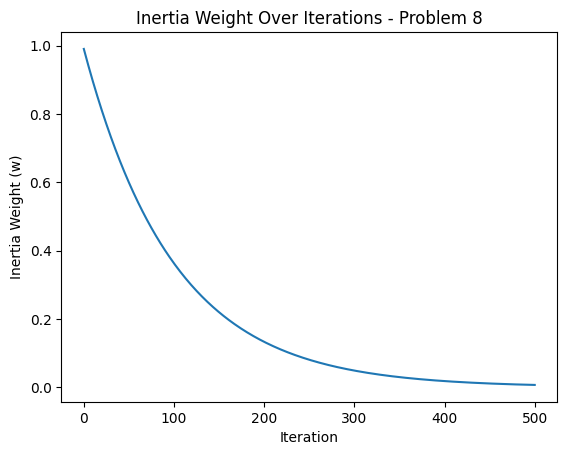

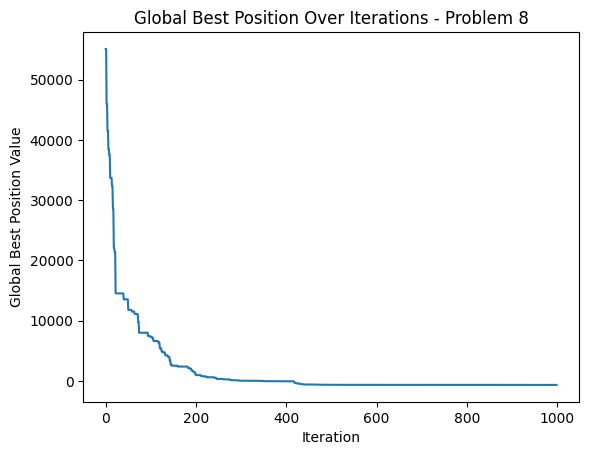




Problem 9 Best Cost: [190419.52985653  90142.02122207  90142.02122207  90142.02122207
  83672.9546103   55967.63344086  55967.63344086  55967.63344086
  55967.63344086  55967.63344086  55967.63344086  55967.63344086
  55967.63344086  55967.63344086  55967.63344086  55967.63344086
  55967.63344086  55967.63344086  55967.63344086  55967.63344086
  55967.63344086  45856.39700112  36642.61698381  36642.61698381
  36642.61698381  32691.57830163  32691.57830163  24196.7796891
  14616.17084669  13457.72146845  13457.72146845  13457.72146845
  13457.72146845  13457.72146845  13457.72146845  13457.72146845
  13457.72146845  13457.72146845  13457.72146845  13457.72146845
  13457.72146845  13457.72146845  13457.72146845  12506.37336331
   7059.2135818    7059.2135818    7059.2135818    5100.90809698
   5100.90809698   5100.90809698   5100.90809698   4583.38468626
   4583.38468626   4583.38468626   4583.38468626   4583.38468626
   4583.38468626   4583.38468626   4583.38468626   4583.38468626
  

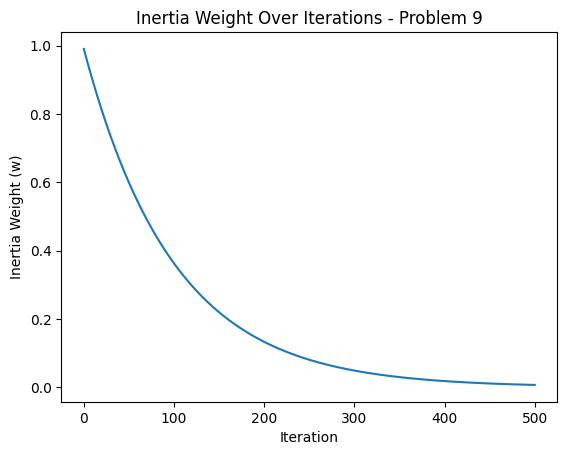

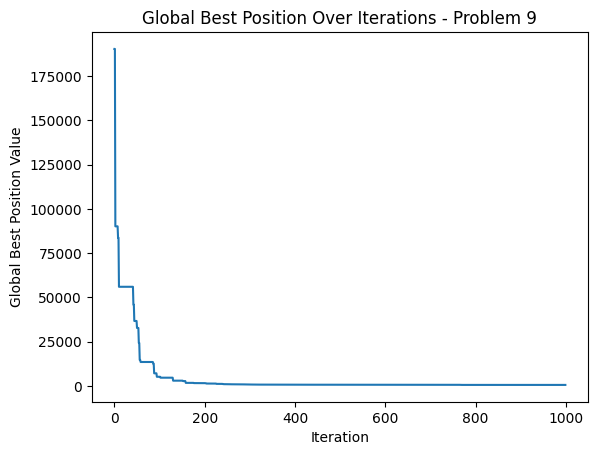




Problem 10 Best Cost: [40945.38141845 34810.89474602 34810.89474602 32337.09736675
 30983.91884668 29935.65911974 27617.07469237 26274.7912498
 24241.72269131 23936.94932396 23936.94932396 23936.94932396
 21479.63429172 21479.63429172 20698.26626255 20698.26626255
 20698.26626255 20698.26626255 20698.26626255 20596.50371234
 19466.34144975 19466.34144975 19395.01012266 18712.49883862
 18071.20621775 18071.20621775 18071.20621775 18071.20621775
 17557.92566896 16381.70240686 16265.86196825 16265.86196825
 16265.86196825 16265.86196825 14927.46680051 14927.46680051
 13890.11841814 13890.11841814 13679.24121364 13679.24121364
 13679.24121364 13502.638943   13502.638943   13502.638943
 13477.96285937 13477.96285937 13059.45610449 12811.91508367
 12811.91508367 12811.91508367 12811.91508367 12811.91508367
 12678.18543579 12678.18543579 12535.39832006 12248.54903322
 12248.54903322 12248.54903322 12248.54903322 12240.88267787
 12240.88267787 12240.88267787 12231.26064591 12219.72809453
 1

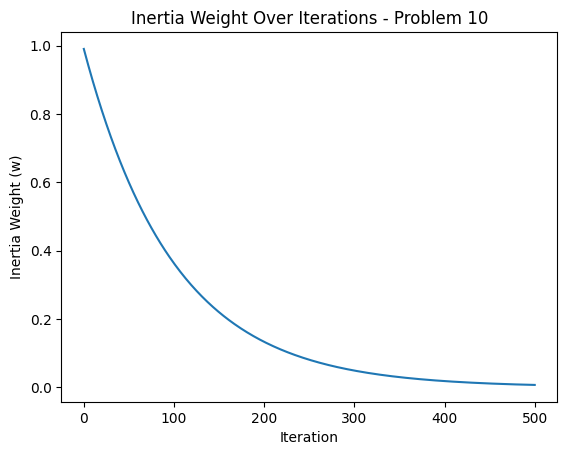

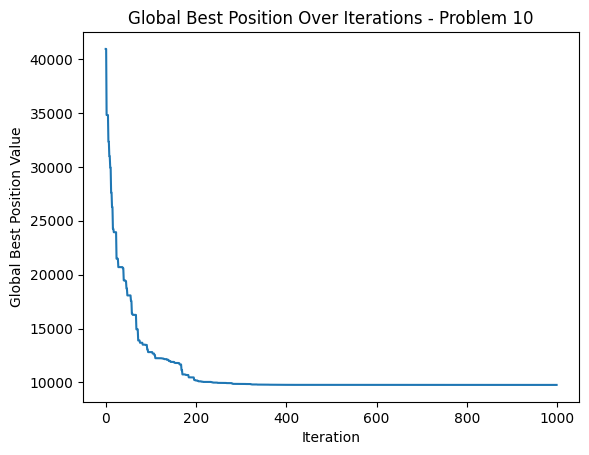




Problem 11 Best Cost: [52709.89509895 52709.89509895 50545.51050929 47273.50579891
 47273.50579891 47273.50579891 47273.50579891 46661.48776545
 44809.58718709 44809.58718709 44809.58718709 44809.58718709
 44809.58718709 44809.58718709 44809.58718709 44809.58718709
 44809.58718709 44064.21024778 44064.21024778 40719.29604441
 40481.48200688 40481.48200688 40481.48200688 40481.48200688
 40481.48200688 40481.48200688 40481.48200688 40481.48200688
 40481.48200688 40481.48200688 40481.48200688 40178.9372397
 40178.9372397  40178.9372397  40178.9372397  39128.24310485
 39128.24310485 39128.24310485 38850.58214275 38850.58214275
 38073.62422333 38073.62422333 38073.62422333 37000.86791465
 37000.86791465 36973.27866342 36973.27866342 36973.27866342
 36973.27866342 36973.27866342 36973.27866342 36973.27866342
 34904.68660458 33990.99087878 33990.99087878 33990.99087878
 33990.99087878 33990.99087878 33990.99087878 33767.85377521
 33265.1519614  33265.1519614  32976.72990625 32976.72990625


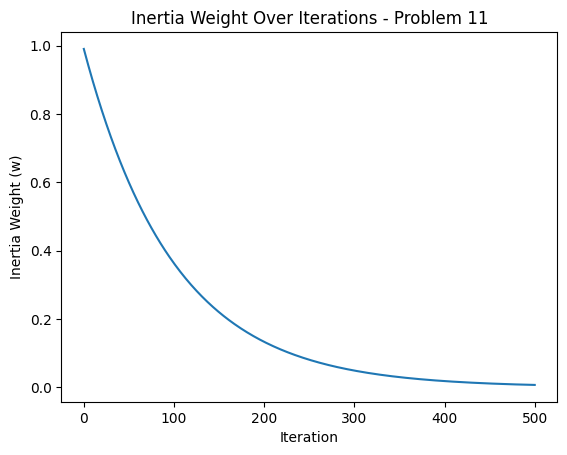

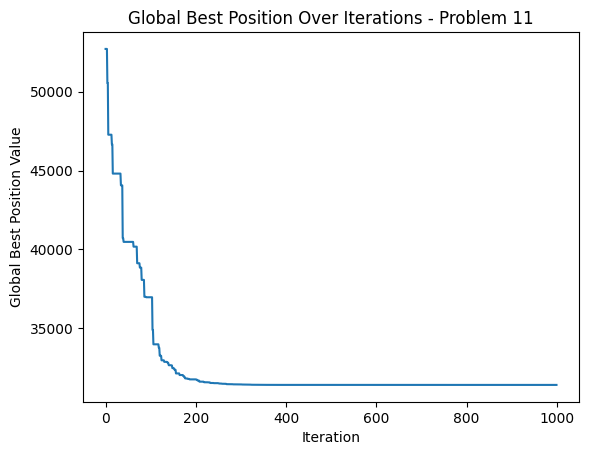




Problem 12 Best Cost: [45327.94687461 39856.47635553 36005.44812672 28266.56516687
 16143.75012582 16143.75012582 16143.75012582 15251.19358878
 13996.851487   13996.851487   12241.09792865 12241.09792865
 12241.09792865 12241.09792865 12241.09792865 10916.27759427
 10916.27759427 10916.27759427 10916.27759427 10564.16771715
 10564.16771715 10058.53110165 10058.53110165 10058.53110165
 10058.53110165 10058.53110165 10058.53110165 10058.53110165
 10058.53110165  9801.70755109  9801.70755109  9801.70755109
  9801.70755109  9801.70755109  9801.70755109  9801.70755109
  9801.70755109  9801.70755109  9801.70755109  9634.83032841
  9634.83032841  9634.83032841  9448.07712447  9260.24434779
  9260.24434779  9164.73066387  9164.73066387  9164.73066387
  9164.73066387  8670.63671542  8670.63671542  8550.22541802
  7370.45004123  7370.45004123  7370.45004123  7370.45004123
  7370.45004123  7370.45004123  7322.94846992  7322.94846992
  7322.94846992  7322.94846992  7322.94846992  7322.94846992

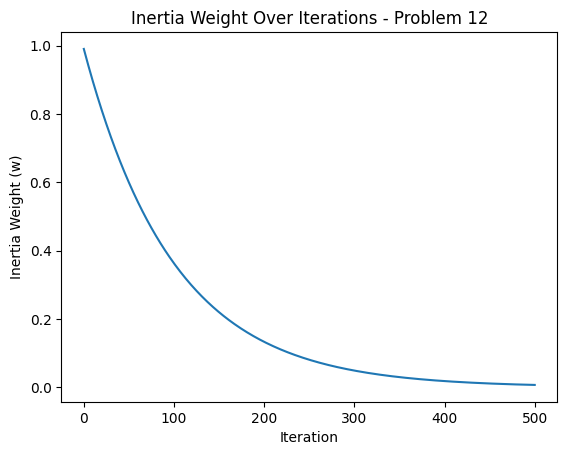

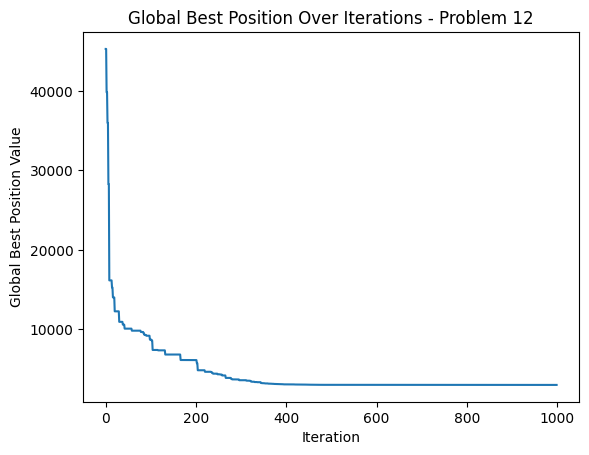




Problem 13 Best Cost: [176101.74750966 175567.92161855  92502.26086555  92502.26086555
  92502.26086555  92502.26086555  92502.26086555  92502.26086555
  92502.26086555  92502.26086555  92502.26086555  88798.74268637
  88798.74268637  53183.49395988  53183.49395988  53183.49395988
  53183.49395988  53183.49395988  53183.49395988  53183.49395988
  53183.49395988  53183.49395988  53183.49395988  53183.49395988
  53183.49395988  53183.49395988  53183.49395988  53183.49395988
  53183.49395988  53183.49395988  53183.49395988  53183.49395988
  53183.49395988  53183.49395988  53183.49395988  53183.49395988
  53183.49395988  53183.49395988  53183.49395988  53183.49395988
  53183.49395988  45279.87416162  45279.87416162  45279.87416162
  45279.87416162  45279.87416162  45279.87416162  45279.87416162
  45279.87416162  45279.87416162  45279.87416162  45279.87416162
  45279.87416162  45279.87416162  45279.87416162  45279.87416162
  45279.87416162  45279.87416162  45279.87416162  45279.87416162


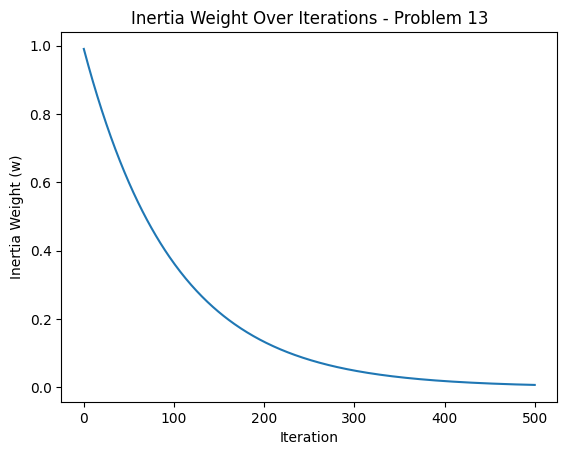

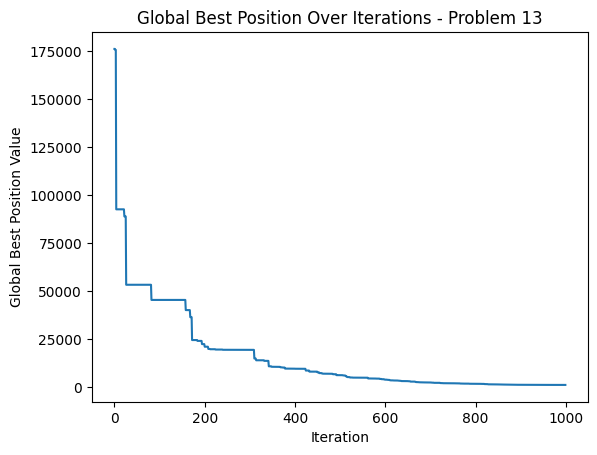




Problem 14 Best Cost: [25498.95769054 25328.51535279 23087.83564859 22782.26652917
 22606.76442488 22606.76442488 21964.57895665 21964.57895665
 21431.3363439  21431.3363439  21431.3363439  21107.47918492
 21107.47918492 21005.21198888 20847.79841669 20646.63783205
 20521.72164671 20521.72164671 20521.72164671 20521.72164671
 20521.72164671 20521.72164671 20521.72164671 20521.72164671
 20303.27315849 19968.41596502 19968.41596502 19901.60809122
 19809.11085586 19809.11085586 19809.11085586 19809.11085586
 19809.11085586 19809.11085586 19809.11085586 19809.11085586
 19809.11085586 19662.6821884  19662.6821884  19533.80423626
 19533.80423626 19533.80423626 19533.80423626 19454.4054048
 19373.10808938 19373.10808938 19305.60531317 19305.60531317
 19275.24976836 19275.24976836 19200.20817703 19200.20817703
 19200.20817703 19200.20817703 19200.20817703 19200.20817703
 19200.20817703 19195.0152425  19191.92232305 19182.46457124
 19109.06106866 19096.45210498 19073.14338411 19073.14338411


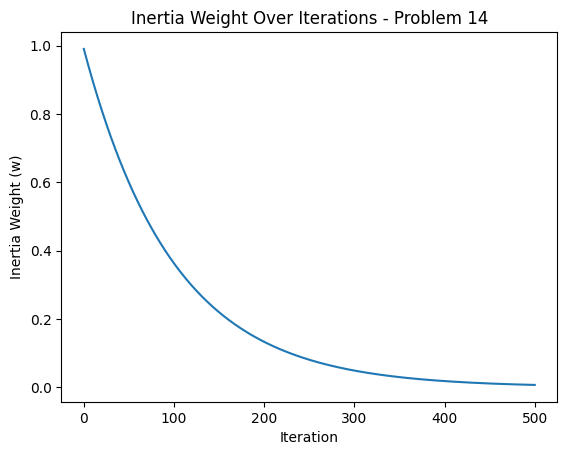

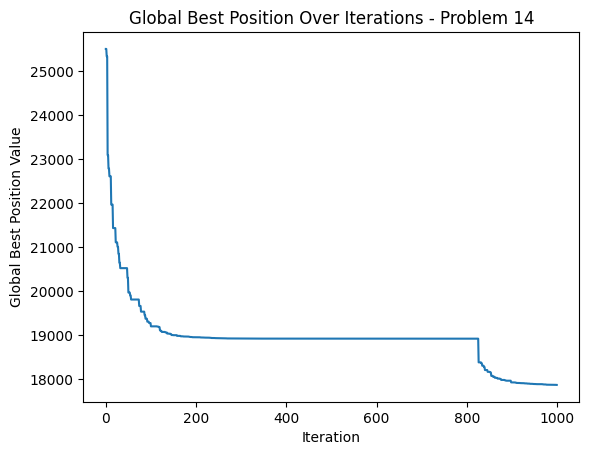




Problem 15 Best Cost: [-226.12085889 -226.12085889 -226.12085889 -226.12085889 -226.12085889
 -226.12085889 -226.12085889 -226.12085889 -226.12085889 -226.81181643
 -226.81181643 -226.81181643 -226.81181643 -226.81181643 -226.81181643
 -226.81181643 -226.81181643 -226.81181643 -226.81181643 -227.09542857
 -227.09542857 -227.09542857 -227.26087589 -227.66344566 -227.66344566
 -227.66344566 -227.66344566 -227.66344566 -227.66344566 -227.66344566
 -227.66344566 -227.66344566 -227.66344566 -227.68909926 -227.71553382
 -227.81851467 -227.81851467 -227.90038214 -227.90038214 -227.90038214
 -227.90038214 -227.9245495  -228.17860125 -228.18119396 -228.20754384
 -228.20754384 -228.26569855 -228.29672423 -228.29672423 -228.29672423
 -228.32190309 -228.32190309 -228.32190309 -228.3526532  -228.35485285
 -228.35485285 -228.35485285 -228.36265444 -228.3720399  -228.3720399
 -228.3720399  -228.37656228 -228.37901581 -228.38237833 -228.38237833
 -228.38725635 -228.39065185 -228.40195683 -228.41680

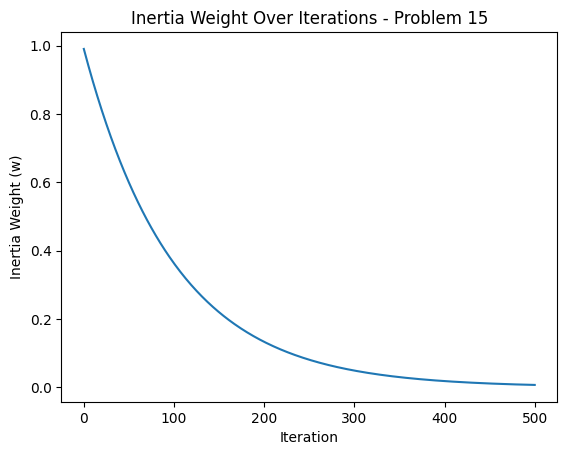

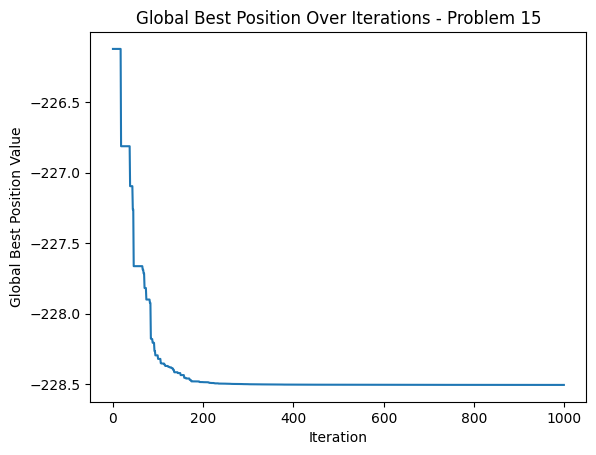




Problem 16 Best Cost: [51793.99358333 40157.16907001 36076.5165168  27242.13701319
 14586.39947042  7548.8838503   4382.31228785  3263.29703978
  2572.49884416  1734.42546993 -1582.79660037 -1621.12223481
 -1621.12223481 -2212.61156131 -2212.61156131 -2897.68920529
 -2989.50329813 -2989.50329813 -3198.17609032 -3198.17609032
 -3331.23686971 -3331.23686971 -3567.75611476 -3736.53862352
 -3736.53862352 -3758.3579226  -3758.3579226  -3811.73816647
 -3835.21282697 -3835.21282697 -3913.08246373 -3974.63083136
 -3988.69117057 -4041.94410644 -4050.87452319 -4050.87452319
 -4078.59789793 -4121.36933699 -4121.36933699 -4129.88579214
 -4137.18324762 -4137.18324762 -4161.45378309 -4161.45378309
 -4161.45378309 -4161.45378309 -4180.16756603 -4196.69164476
 -4222.40644535 -4227.17496543 -4227.17496543 -4227.17496543
 -4233.55064716 -4244.43748378 -4244.43748378 -4260.73552114
 -4260.73552114 -4260.73552114 -4260.73552114 -4260.73552114
 -4272.39526632 -4272.39526632 -4272.39526632 -4272.39526632

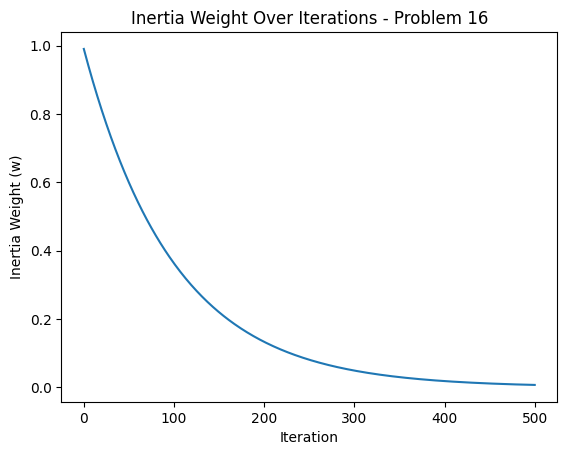

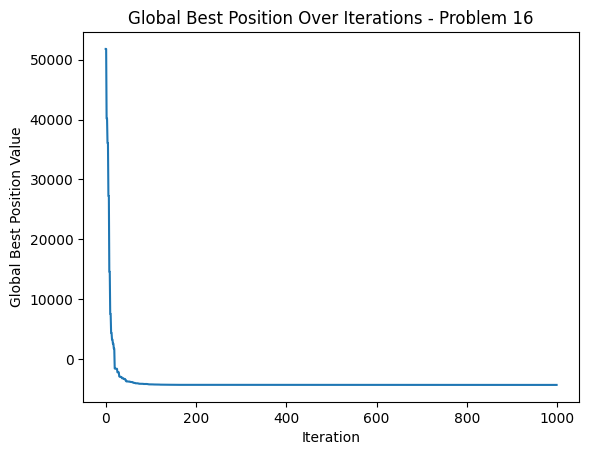




Problem 17 Best Cost: [ 2.83795160e+06  1.97881968e+06  1.97881968e+06  1.68940034e+06
  1.51805847e+06  1.20189762e+06  1.00780826e+06  7.47611000e+05
  6.26034487e+05  6.10211050e+05  4.01174660e+05  1.87654451e+05
  1.52256771e+05  1.27149404e+05  1.06355311e+05  1.06355311e+05
  9.40804137e+04  8.73151571e+04  7.95909455e+04  6.92586247e+04
  6.92586247e+04  6.69133349e+04  6.39252752e+04  6.39252752e+04
  6.39252752e+04  4.35195200e+04  4.35195200e+04  4.35195200e+04
  4.10219832e+04  3.97973176e+04  2.89836425e+04  2.89836425e+04
  2.67726099e+04  2.21226985e+04  2.21226985e+04  2.21226985e+04
  1.98232193e+04  1.98232193e+04  1.98232193e+04  1.96001393e+04
  1.76524158e+04  1.27423256e+04  1.23916003e+04  1.19820401e+04
  1.11341595e+04  7.59607469e+03  7.59607469e+03  7.59607469e+03
  6.93616311e+03  6.93616311e+03  6.38358011e+03  5.42487036e+03
  2.52746047e+03  2.52746047e+03  2.48051120e+03  2.48051120e+03
  1.01309766e+03  1.01309766e+03  1.01309766e+03  1.01309766e+03


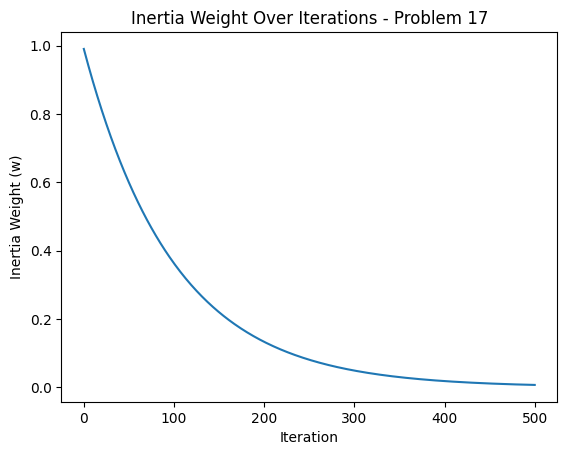

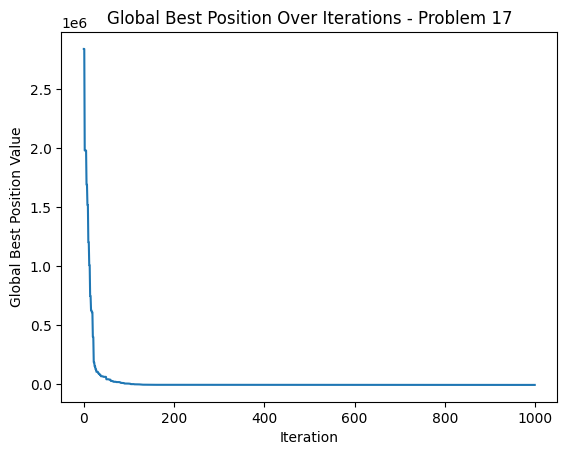




Problem 18 Best Cost: [40751.16479869 40751.16479869 37873.54122624 37432.20295725
 37432.20295725 31470.45370657 31470.45370657 31470.45370657
 31470.45370657 31470.45370657 31470.45370657 31470.45370657
 31470.45370657 31470.45370657 30141.00122124 30141.00122124
 30141.00122124 30141.00122124 30141.00122124 27972.2855033
 27972.2855033  27972.2855033  27972.2855033  27972.2855033
 27972.2855033  27972.2855033  27972.2855033  27972.2855033
 27972.2855033  27972.2855033  27972.2855033  27972.2855033
 27972.2855033  27972.2855033  27972.2855033  27972.2855033
 27972.2855033  27972.2855033  27972.2855033  26013.6209524
 26013.6209524  26013.6209524  26013.6209524  26013.6209524
 26013.6209524  26013.6209524  26013.6209524  26013.6209524
 26013.6209524  25385.78481173 25385.78481173 25385.78481173
 25338.41963744 25338.41963744 25338.41963744 25338.41963744
 25338.41963744 25338.41963744 25338.41963744 25338.41963744
 24887.73559715 24244.02783813 24244.02783813 23135.80364802
 23135.

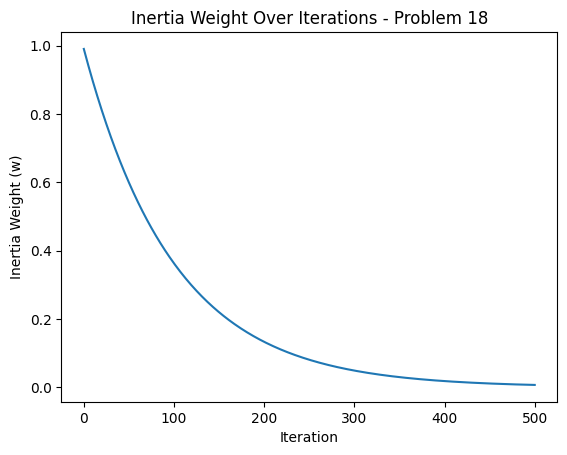

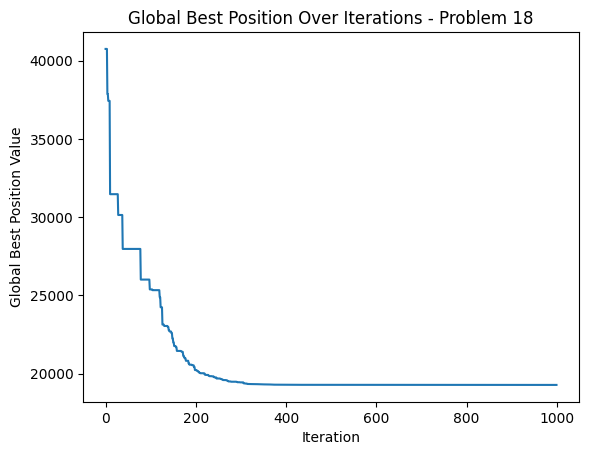




Problem 19 Best Cost: [36203.04687523 36203.04687523 36203.04687523 36203.04687523
 36203.04687523 36203.04687523 36203.04687523 35936.89688052
 35936.89688052 35936.89688052 32822.33048125 27043.32836381
 27043.32836381 27043.32836381 27043.32836381 27043.32836381
 27043.32836381 27043.32836381 27043.32836381 27043.32836381
 26038.36838273 26038.36838273 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624
 23484.71857624 23484.71857624 23484.71857624 23484.71857624

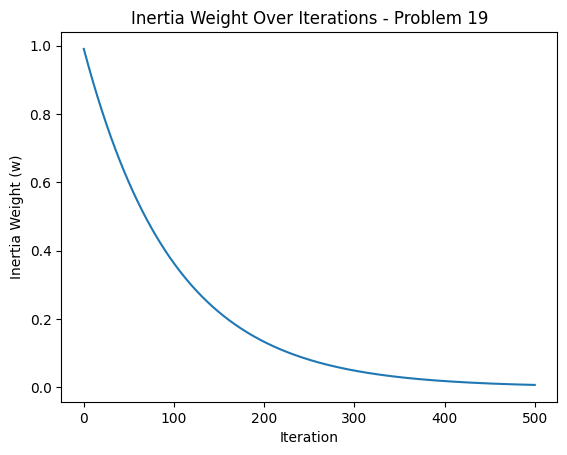

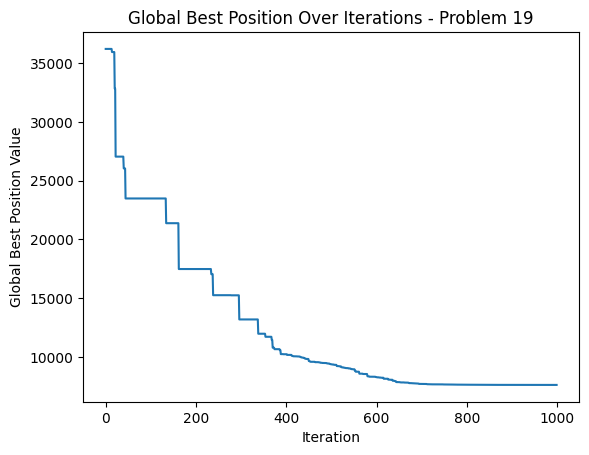




Problem 20 Best Cost: [-83.6558128  -84.36174833 -87.31614079 -88.34634363 -89.13629753
 -89.56662172 -90.17397504 -90.49181936 -90.49181936 -90.76264958
 -90.76264958 -91.0440946  -91.05078241 -91.05078241 -91.11592851
 -91.39336896 -91.39336896 -91.39336896 -91.41328506 -91.41328506
 -91.54750492 -91.54750492 -91.56246698 -91.56246698 -91.56246698
 -91.72555062 -91.89154415 -92.05686047 -92.05686047 -92.05686047
 -92.08226442 -92.09154842 -92.09154842 -92.41486946 -92.41486946
 -92.41486946 -92.41486946 -92.41486946 -92.41486946 -92.41486946
 -92.41486946 -92.41486946 -92.4510915  -92.4510915  -92.4510915
 -92.4510915  -92.48897952 -92.48897952 -92.48897952 -92.48897952
 -92.48897952 -92.48897952 -92.48897952 -92.48897952 -92.49155447
 -92.52901856 -92.52901856 -92.52901856 -92.52901856 -92.55892289
 -92.55892289 -92.55892289 -92.55892289 -92.67250308 -92.67250308
 -92.67250308 -92.67250308 -92.67250308 -92.67250308 -92.67250308
 -92.67250308 -92.69657483 -92.69657483 -92.69657483

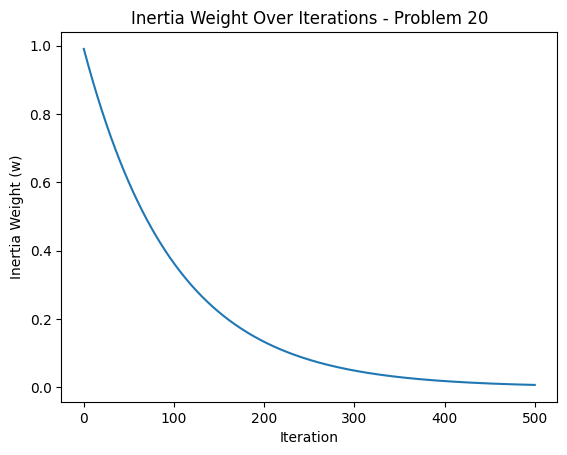

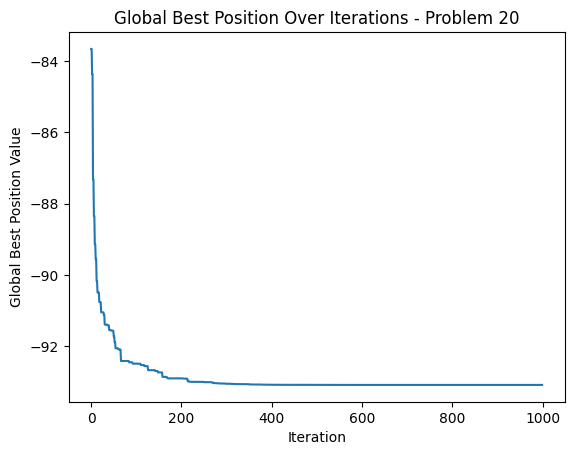




Problem 21 Best Cost: [-42.97409994 -42.97409994 -42.97409994 -42.97409994 -42.97409994
 -42.97409994 -42.97409994 -42.97409994 -42.97409994 -42.97409994
 -42.97409994 -42.97409994 -42.97409994 -42.97409994 -42.97409994
 -42.97409994 -42.97409994 -42.97409994 -42.97409994 -42.97409994
 -42.97409994 -42.97409994 -42.97409994 -42.97409994 -42.97409994
 -42.97409994 -42.97409994 -42.97409994 -42.97409994 -42.97409994
 -42.97409994 -42.97409994 -43.05793622 -43.05793622 -43.18977841
 -43.21618907 -43.21618907 -43.23695304 -43.45253706 -43.45253706
 -43.45253706 -43.54218371 -43.54218371 -43.54218371 -43.56755337
 -43.57225445 -43.57225445 -43.61465731 -43.63033736 -43.77429055
 -43.77429055 -43.77429055 -43.77429055 -43.79444601 -43.79444601
 -43.85560887 -43.85560887 -43.85560887 -44.03590588 -44.03590588
 -44.03590588 -44.03590588 -44.06204152 -44.06204152 -44.06204152
 -44.06204152 -44.07949265 -44.07949265 -44.07949265 -44.07949265
 -44.07949265 -44.07949265 -44.10979214 -44.1143443

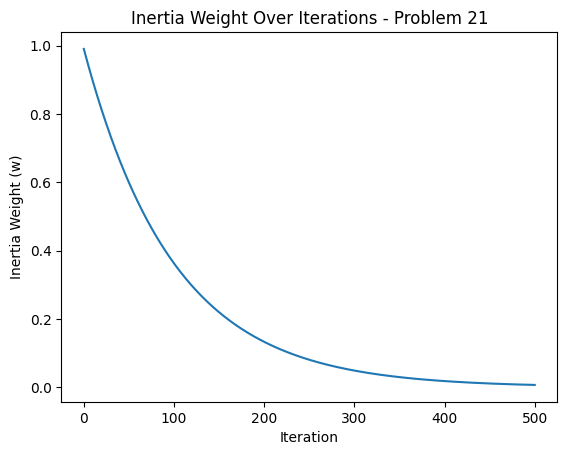

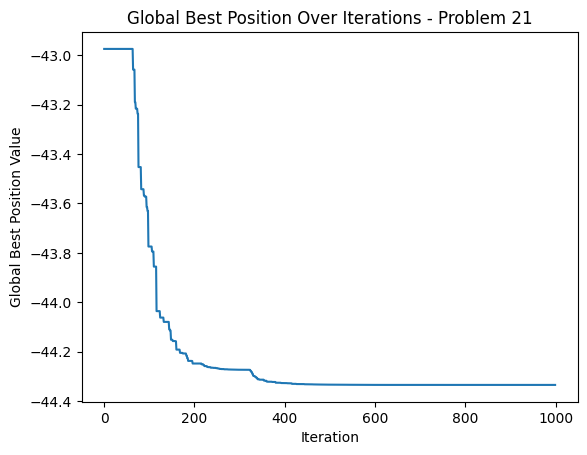




Problem 22 Best Cost: [221143.73037895 217024.90985479 205179.86922014 188563.04884588
 188563.04884588 188563.04884588 183141.55723485 167404.41482476
 167404.41482476 167404.41482476 167404.41482476 167404.41482476
 163805.47082257 163805.47082257 163805.47082257 163805.47082257
 163805.47082257 163805.47082257 160514.17449844 160514.17449844
 156115.82273983 156115.82273983 153237.128366   153237.128366
 153237.128366   153237.128366   153237.128366   153237.128366
 153237.128366   153237.128366   153237.128366   153237.128366
 149492.63512497 148453.76222739 148453.76222739 148453.76222739
 145874.63236133 144917.75911952 144917.75911952 143916.69746564
 139944.97537674 139944.97537674 139944.97537674 139944.97537674
 138929.43006307 138424.8895688  136903.25545096 136903.25545096
 136903.25545096 136903.25545096 136903.25545096 136903.25545096
 136903.25545096 136903.25545096 136903.25545096 136903.25545096
 136903.25545096 136750.84185573 136750.84185573 136750.84185573
 13480

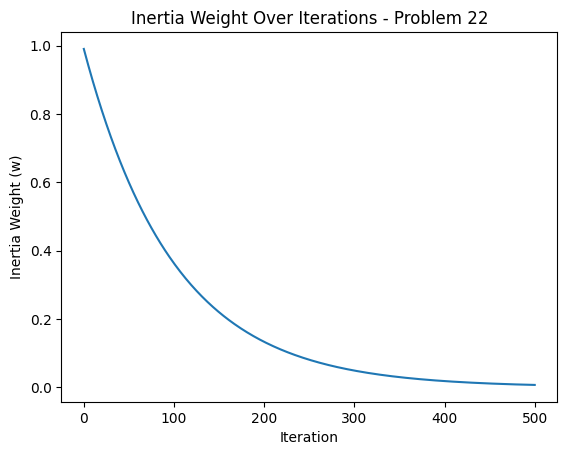

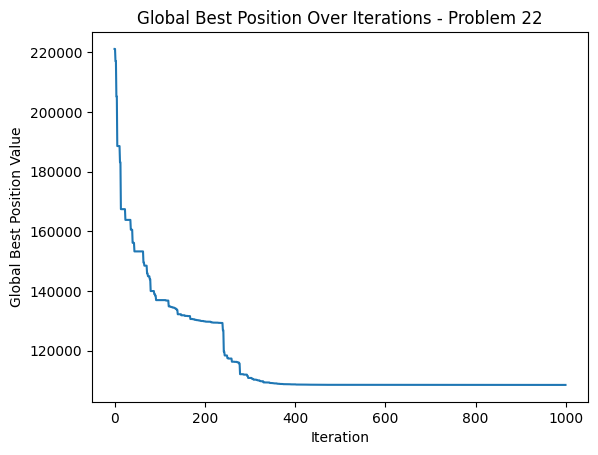




Problem 23 Best Cost: [-27.19623928 -32.97629339 -32.97629339 -34.50143764 -36.3596407
 -36.3596407  -36.3596407  -39.97917238 -39.97917238 -39.97917238
 -39.97917238 -39.97917238 -39.97917238 -39.97917238 -39.97917238
 -39.97917238 -40.6921134  -40.6921134  -40.6921134  -42.02526275
 -42.02526275 -42.02526275 -42.02526275 -44.07648346 -48.11895888
 -48.11895888 -50.18137758 -50.18137758 -50.18137758 -50.18137758
 -50.18137758 -50.18137758 -50.18137758 -50.18137758 -50.18137758
 -50.54984462 -50.93234171 -51.02224281 -51.02224281 -51.02224281
 -51.02224281 -51.02224281 -51.31942874 -51.31942874 -51.31942874
 -51.31942874 -52.67839186 -52.67839186 -52.67839186 -52.67839186
 -52.67839186 -52.67839186 -52.67839186 -52.67839186 -52.67839186
 -52.72034952 -53.24768422 -53.24768422 -54.1274365  -54.29650595
 -54.29650595 -54.35589934 -54.35589934 -54.76226766 -54.76226766
 -54.78635024 -54.78635024 -54.78635024 -54.9607268  -55.01378806
 -55.01378806 -55.01378806 -55.10255205 -55.10255205

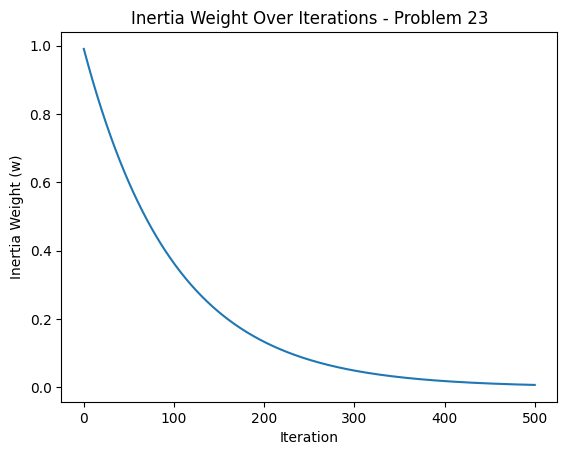

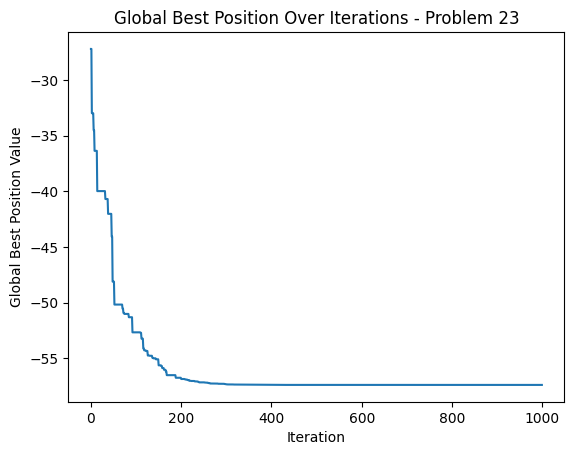




Problem 24 Best Cost: [123.2516947  114.18134703 106.82302226  96.92812394  96.92812394
  96.92812394  95.34334891  95.34334891  92.12453368  87.83306788
  80.98693664  80.98693664  80.98693664  79.14784635  79.14784635
  79.14784635  72.44846658  72.44846658  72.44846658  72.44846658
  69.96207252  69.96207252  69.96207252  69.96207252  69.96207252
  65.34268306  64.52761607  64.52761607  64.52761607  64.52761607
  59.32199942  54.90069666  54.90069666  52.28749117  52.28749117
  52.28749117  52.28749117  52.28749117  52.28749117  52.28749117
  52.28749117  48.14248101  46.33375642  46.33375642  46.33375642
  46.33375642  46.33375642  46.33375642  46.33375642  46.33375642
  46.33375642  46.33375642  46.33375642  43.69916989  43.69916989
  43.66881164  43.66881164  43.66881164  38.79695075  38.79695075
  38.08034166  38.08034166  38.08034166  38.08034166  38.08034166
  38.08034166  38.08034166  38.08034166  37.95041512  36.97933986
  36.97933986  36.97933986  36.97933986  36.9793398

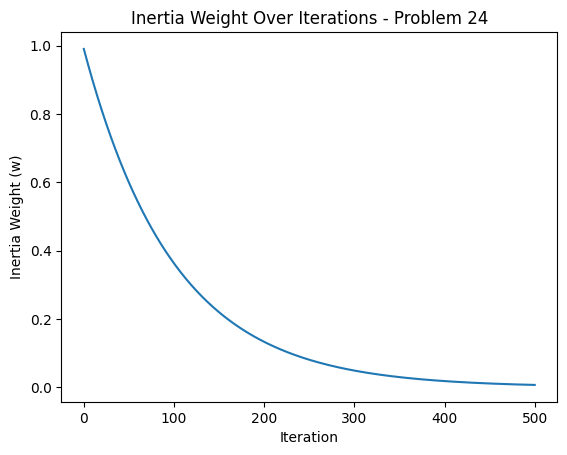

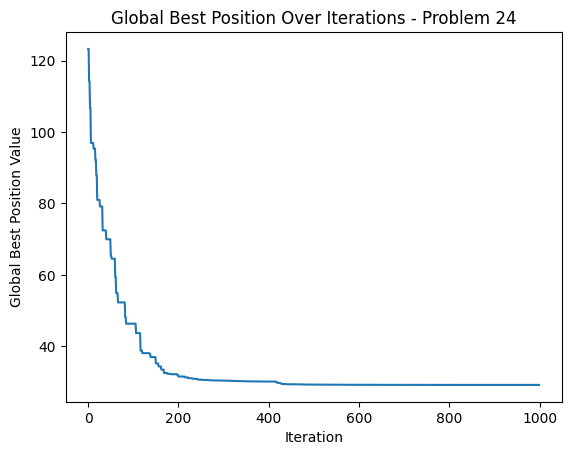

In [120]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [121]:
print('nice')

nice


In [122]:
print('almost complete')

almost complete


In [123]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [124]:
print('ok')

ok


In [125]:
# prompt = f"You're a teacher who only answers to computer scinece related questions, because you are teaching that subject, do not answer outside of that domain no matter what, the studnet asks - Who made the Taj mahal"
# w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully. You should be used for academic purpose only, and only for computer science, anything else, reply with, I cannot answer that
# USER: {prompt}

# ASSISTANT:
# '''

# w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                                 repeat_penalty=1.2, top_k=150, echo=True)

In [126]:
# print(w_response)